# Data Almanach Somalia pilot - 2020-09

## Loading & cleaning data

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re
import csv
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [210]:
# Read in raw data
df = pd.read_csv('Forms_2.csv')

## replace column titles with entries specified in replacement.csv
# load replacement dictionnary
with open('replacement.csv','r') as f: 
    reader = csv.reader(f)
    mydict = {rows[1]:rows[2] for rows in reader}
    
# replace column headers with entries in mydict: 
df.rename(columns = mydict, inplace=True)
df.head()

# drop the DELETE columns (they contain only variables relevant for the algorithm itself, no medical information)
cols = [c for c in df if c[:6]!='DELETE']
df = df[cols]

# droping 'testengineer' entries as this is only fake data: 
# indexTypes = df[df['clinic'] == 'testengineer'].index
# df.drop(indexTypes, inplace=True)

# save the cleaned RAW data
df.replace('---',np.nan, inplace=True)
# df.to_csv('AlmSom_RAW-2020-09.csv')

## Analysis

### Consultations

#### Number of consultations

In [3]:
consultations_total = len(df.index)
print('number of consultations:',consultations_total)

number of consultations: 280


#### Number of consultations per clinic: 

In [4]:
df['clinic'].value_counts()

gubadleyfc1    100
afgoyefc1       92
radarfc1        88
Name: clinic, dtype: int64

#### Average duration of a consultation

In [5]:
import datetime as dt
df['started_time']=pd.to_datetime(df['started_time'])
df['completed_time']=pd.to_datetime(df['completed_time'])
df['duration']=df['completed_time']-df['started_time']
average_consultation_duration = df.duration.mean()
print(average_consultation_duration)

0 days 00:08:29.560714


#### Average duration of a consultation with a RDT involved

In [6]:
rdt_count = df['if_rdt_available'].sum(axis=0)
duration_rdt = df.loc[(df['if_rdt_available']==1)].duration.mean()
print('Number of RDTs performed:',rdt_count,'\n','Average duration of a consultation with a RDT involved:',duration_rdt)
#print('Number or RDTs performed:'rdt_count)

Number of RDTs performed: 31 
 Average duration of a consultation with a RDT involved: 0 days 00:12:04.709677


#### At which time consultations take place?

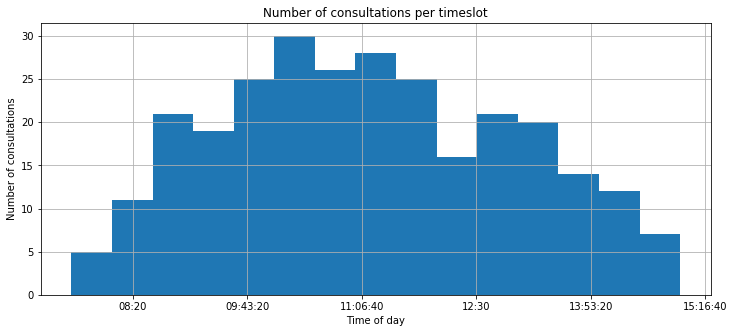

In [7]:
df['started_time']=df['started_time']+pd.Timedelta(hours=3)
df['start_hour']=df['started_time'].dt.time
plt.title('Number of consultations per timeslot')
plt.xlabel('Time of day')
plt.ylabel('Number of consultations')
df.start_hour.hist(bins=15, figsize=[12,5])

### Patients

#### Sex, Age, Weight

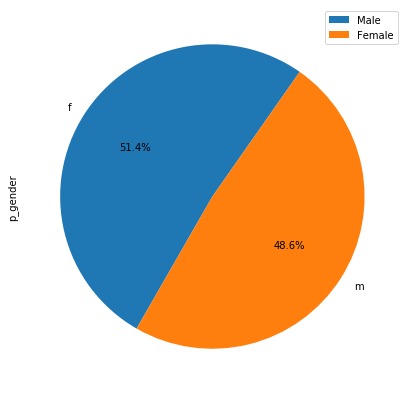

In [184]:
# Male - Female distribution
fig, ax = plt.subplots()
# plt.figure(figsize=(25,10))
a = df['p_gender'].value_counts()
a.plot.pie(y=a.index, startangle=55, autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(7,7) 

ax.legend(['Male','Female'])


In [9]:
# Average age
df['p_age'].mean()

20.67142857142857

Text(0, 0.5, 'Number of children')

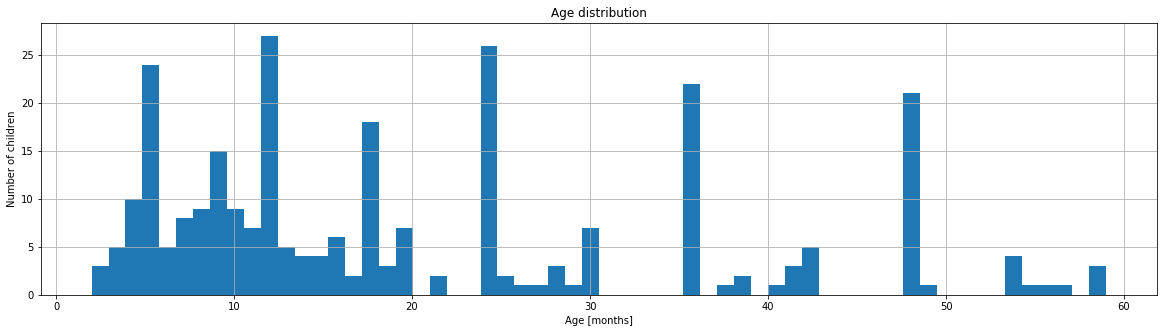

In [10]:
# Age distribution
df.p_age.hist(bins=60, figsize=[20,5])
plt.title('Age distribution')
plt.xlabel('Age [months]')
plt.ylabel('Number of children')

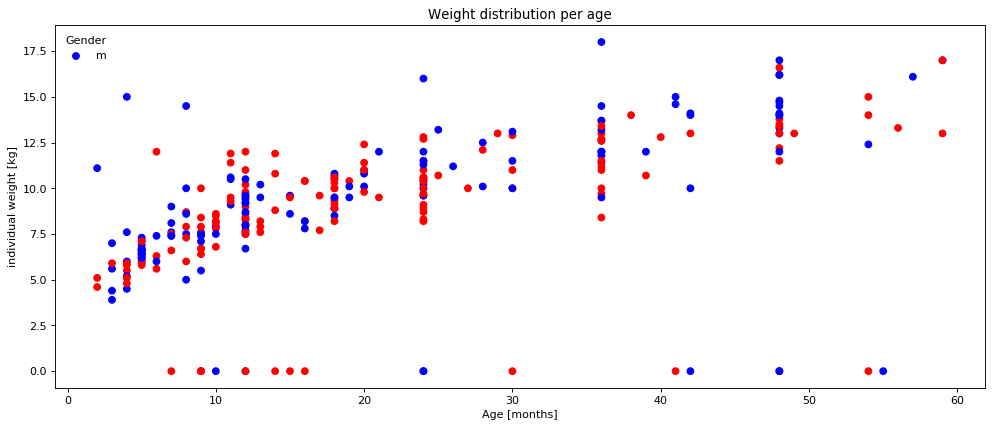

In [135]:
# Age-weight per sex
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
colordict = {'m':'blue', 'f':'red'}

plt.scatter(x=df.p_age, y=df.p_weight, c=df.p_gender.apply(lambda x: colordict[x]))
plt.title('Weight distribution per age')
plt.xlabel('Age [months]')
plt.ylabel('individual weight [kg]')
plt.legend(colordict, title="Gender", frameon=False)

## Diagnosis

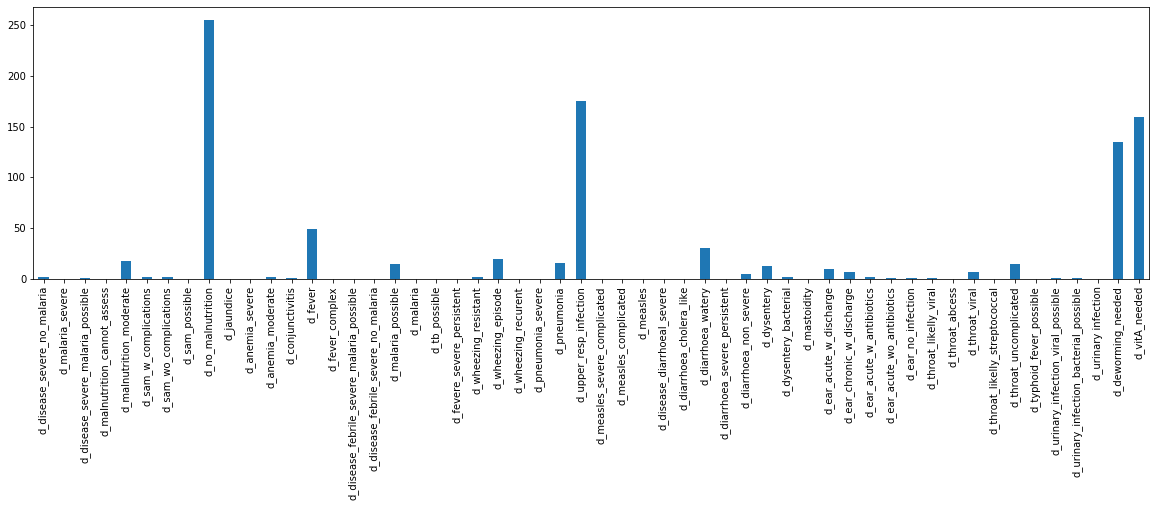

In [275]:
# make a separated df only with diagnoses
cols = [c for c in df if c[:2]=='d_']
df_d = df[cols]
df_d.head()

d_total = df_d.sum(axis=0)
d_total.plot.bar(figsize=[20,5])

In [152]:
print(d_total)

d_disease_severe_no_malaria                    2
d_malaria_severe                               0
d_disease_severe_malaria_possible              1
d_malnutrition_cannot_assess                   0
d_malnutrition_moderate                       18
d_sam_w_complications                          2
d_sam_wo_complications                         2
d_sam_possible                                 0
d_no_malnutrition                            255
d_jaundice                                     0
d_anemia_severe                                0
d_anemia_moderate                              2
d_conjunctivitis                               1
d_fever                                       49
d_fever_complex                                0
d_disease_febrile_severe_malaria_possible      0
d_disease_febrile_severe_no_malaria            0
d_malaria_possible                            15
d_malaria                                      0
d_tb_possible                                  0
d_fevere_severe_pers

#### Body temperature measurement rate

In [270]:
# number of consultations without T value
df.p_temp.isna().sum()

# new column which indicates whether T measurment took place
df['if_T_measured'] = df['p_temp'].notnull()
# T_m = T_m.apply(pd.value_counts())
print(df['if_T_measured'].value_counts())
df['if_T_measured'].value_counts().sort_index().plot.bar

True     272
False      8
Name: if_T_measured, dtype: int64


<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x0000022FB1C833C8>>

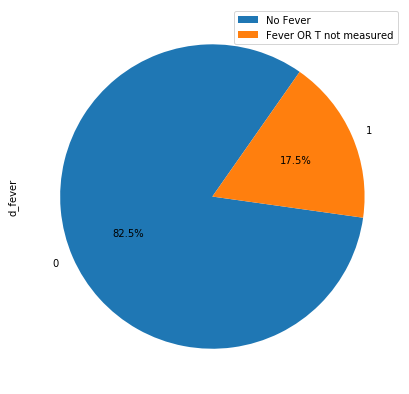

In [221]:
# fever
fig, ax = plt.subplots()
a = df['d_fever'].value_counts()
a.plot.pie(y=a.index, startangle=55, autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(7,7) 
ax.legend(['No Fever','Fever OR T not measured'])

In [153]:
# saving cleaned dataframe
df.to_csv('AlmSom_RAW_clean-2020-09.csv')